In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_excel('AIRBNB.xlsx',index_col=0)

In [ ]:
# prompt: clean missing values in name and host name

df['name']=df['name'].fillna('No name')
df['host_name']=df['host_name'].fillna('No host_name')

In [ ]:
# prompt: ffill last_review
df['last_review'].fillna(method='ffill', inplace=True)

<ipython-input-5-87f45cd5c982>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['last_review'].fillna(method='ffill', inplace=True)


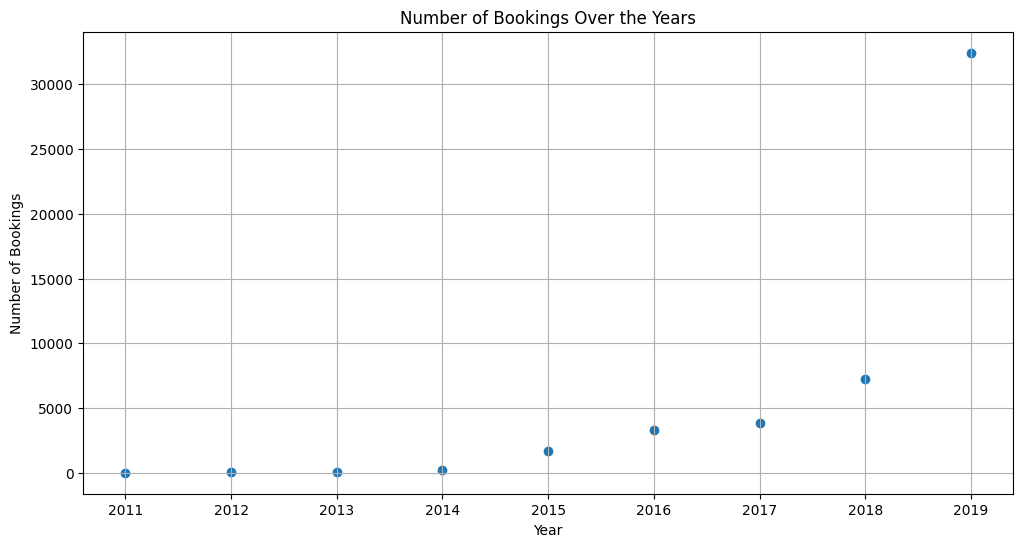

In [ ]:
# prompt: scatter plot booking over years

df['year'] = pd.to_datetime(df['last_review']).dt.year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.scatter(year_counts.index, year_counts.values)
plt.title('Number of Bookings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

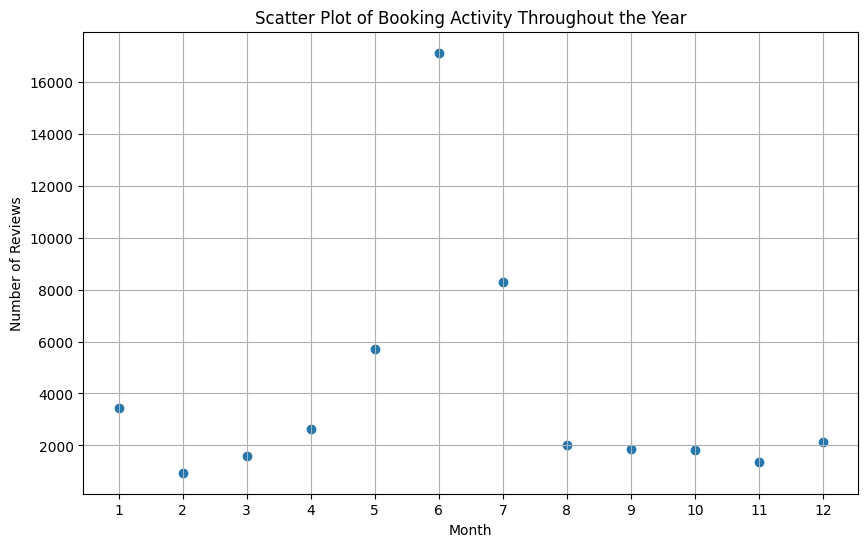

In [ ]:
# prompt: scatter plot booking during a year

df['last_review'] = pd.to_datetime(df['last_review'])
df['review_month'] = df['last_review'].dt.month

monthly_reviews = df['review_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(monthly_reviews.index, monthly_reviews.values)
plt.title('Scatter Plot of Booking Activity Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

The correlation between price and number of reviews is: -0.04795422658266219


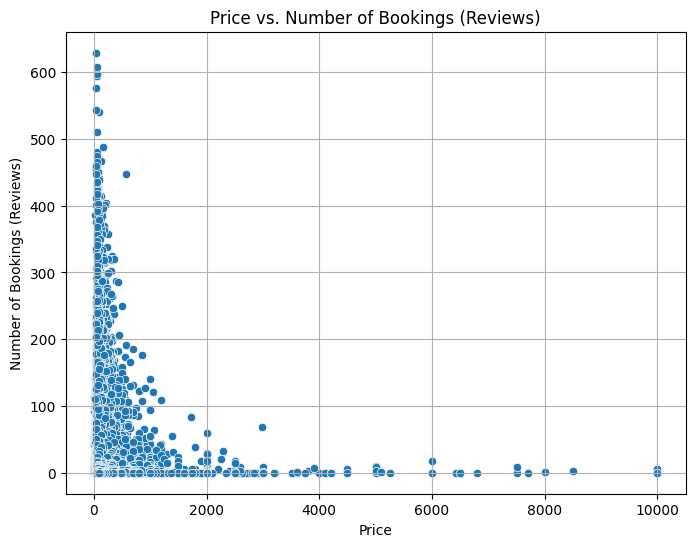

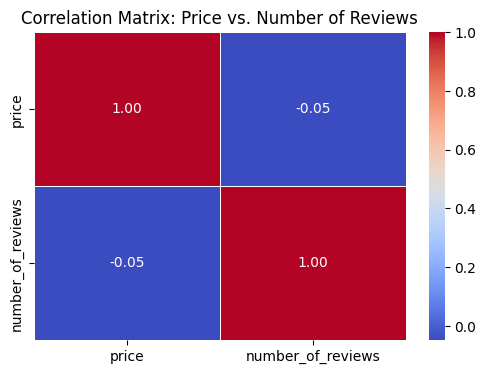

In [ ]:
# prompt: correlation between price and no of booking

# Assuming 'price' and 'number_of_reviews' are the columns in your dataframe
# If your column for number of bookings has a different name, replace 'number_of_reviews'
correlation = df['price'].corr(df['number_of_reviews'])

print(f"The correlation between price and number of reviews is: {correlation}")

# Visualize the correlation (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df)
plt.title('Price vs. Number of Bookings (Reviews)')
plt.xlabel('Price')
plt.ylabel('Number of Bookings (Reviews)')
plt.grid(True)
plt.show()

# Another visualization option is a heatmap of the correlation matrix
correlation_matrix = df[['price', 'number_of_reviews']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Price vs. Number of Reviews')
plt.show()

In [ ]:
# prompt: find correlation between price and availability

correlation = df['price'].corr(df['availability_365'])
print(f"The correlation between price and availability_365 is: {correlation}")

The correlation between price and availability_365 is: 0.08182882742168794


In [ ]:
pviottable_bookings = df.pivot_table(index='neighbourhood_group',columns='room_type',values='number_of_reviews',aggfunc='sum')

pviottable_bookings



room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


In [ ]:
# prompt: Using dataframe pviottable_bookings: suggest a plot

#A stacked bar chart would be a good way to visualize the breakdown of 'Entire home/apt', 'Private room', and 'Shared room' bookings by 'neighbourhood_group'.

import altair as alt
# Melting the dataframe to long format for plotting
df_melted = pviottable_bookings.reset_index().melt(id_vars='neighbourhood_group', var_name='room_type', value_name='count')

# Creating the stacked bar chart
chart = alt.Chart(df_melted).mark_bar().encode(
    x='neighbourhood_group:N',
    y='count:Q',
    color='room_type:N',
    tooltip=['neighbourhood_group', 'room_type', 'count']
).properties(
    title='Booking Count by Neighbourhood Group and Room Type'
)

chart

alt.Chart(...)

In [ ]:
df['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<Axes: xlabel='neighbourhood_group'>

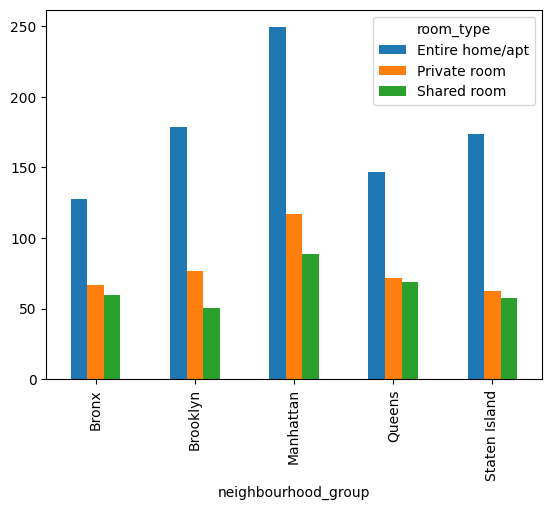

In [ ]:
pviottable = df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')
pviottable = pviottable.reset_index()
pviottable.plot.bar(x="neighbourhood_group",y=['Entire home/apt','Private room','Shared room'])

In [ ]:
#df.fillna({'last_review':'Not Applicable'},inplace= True)
print(df['last_review'])

id
2539       2018-10-19
2595       2019-05-21
3647       2019-05-21
3831       2019-07-05
5022       2018-11-19
              ...    
36484665   2019-07-08
36485057   2019-07-08
36485431   2019-07-08
36485609   2019-07-08
36487245   2019-07-08
Name: last_review, Length: 48895, dtype: datetime64[ns]


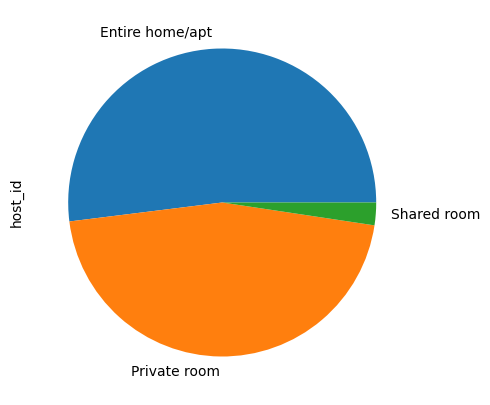

In [ ]:
df_empty_hostname = df[df['host_name'].isnull()]

df['room_type'].unique()

df_room =df.groupby('room_type')['host_id'].count()
plot = df_room.plot.pie(y='room_type', figsize=(11, 5))

<Axes: xlabel='neighbourhood_group'>

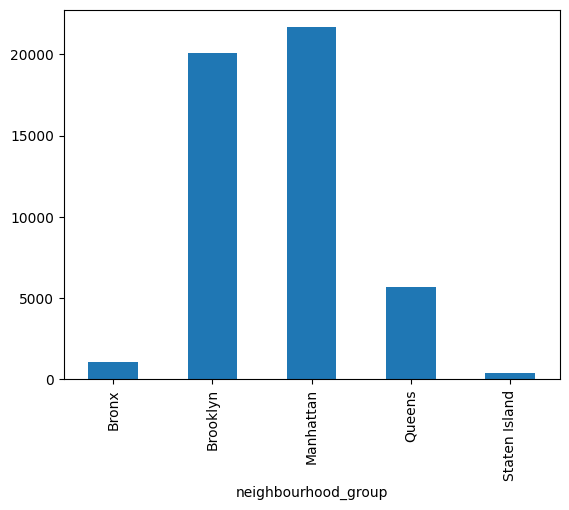

In [ ]:
df_neighbourhood_group=df.groupby('neighbourhood_group')['host_id'].count()
df_neighbourhood_group
df_neighbourhood_group.plot.bar()

In [ ]:
df.count()


,0
name,48895
host_id,48895
host_name,48895
neighbourhood_group,48895
neighbourhood,48895
latitude,48895
longitude,48895
room_type,48895
price,48895
minimum_nights,48895
